<a href="https://colab.research.google.com/github/hemantparakh/BITS_AMIL_2023_Semester_1/blob/main/MFML/Assigment-2/MFML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1) Power Method and Associated problems (2 marks)

i) Generate using code a random integer matrix C of size 4×3 and a matrix
A1 defined as A1 = CTC and workout its characteristic equation.
Using any software package, determine the eigenvalues and eigenvectors.

**Deliverables**: The matrices C and A1, the computation of the characteristic
equation, the eigenvalues and eigenvectors as obtained from
the package.

In [ ]:
import numpy as np

# Step 1: Generate a random integer matrix C of size 4×3
C = np.random.randint(1, 10, (4, 3))
print("Matrix C:")
print(C)

# Step 2: Compute the matrix A1 = C^T * C
A1 = np.dot(C.T, C)
print("\nMatrix A1:")
print(A1)

# Step 3: Calculate the characteristic equation of A1
char_eq_coefficients = np.poly(A1)

# Display the characteristic equation
print("\nCharacteristic equation:")
print(np.poly1d(char_eq_coefficients))

# Step 4: Determine the eigenvalues and eigenvectors of A1
eigenvalues, eigenvectors = np.linalg.eig(A1)

# Display the eigenvalues and eigenvectors
print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)


Matrix C:
[[4 4 8]
 [4 6 6]
 [3 1 7]
 [2 6 6]]

Matrix A1:
[[ 45  55  89]
 [ 55  89 111]
 [ 89 111 185]]

Characteristic equation:
   3       2
1 x - 319 x + 5528 x - 8576

Eigenvalues:
[300.71178776   1.72146003  16.56675221]

Eigenvectors:
[[ 0.3785851   0.90996035  0.16924976]
 [ 0.50502106 -0.04984458 -0.86166655]
 [ 0.77564622 -0.41168881  0.47841955]]


In [ ]:
#Trying the solution without inbuilt function

import numpy as np

def qr_algorithm(A, tol=1e-10, max_iter=1000):
    """
    Compute eigenvalues and eigenvectors of a matrix A using the QR algorithm.

    Parameters:
        A (numpy.ndarray): The matrix for which to compute eigenvalues and eigenvectors.
        tol (float): Tolerance for convergence. Default is 1e-10.
        max_iter (int): Maximum number of iterations. Default is 1000.

    Returns:
        eigenvalues (numpy.ndarray): Array of eigenvalues.
        eigenvectors (numpy.ndarray): Matrix whose columns are the eigenvectors.
    """
    n = A.shape[0]
    V = np.eye(n)  # Initialize eigenvectors as identity matrix

    for _ in range(max_iter):
        Q, R = np.linalg.qr(A)
        A = np.dot(R, Q)
        V = np.dot(V, Q)

        # Check convergence
        if np.linalg.norm(np.tril(A, -1)) < tol:
            break

    # Extract eigenvalues from the diagonal of A
    eigenvalues = np.diag(A)

    return eigenvalues, V

def find_eigenvalues(A):
    """
    Compute the eigenvalues of a matrix A.

    Parameters:
        A (numpy.ndarray): The matrix for which to compute the eigenvalues.

    Returns:
        numpy.ndarray: The eigenvalues of the matrix.
    """
    # Ensure the matrix is square
    if A.shape[0] != A.shape[1]:
        raise ValueError("Matrix must be square for eigenvalue computation.")

    # Get the size of the matrix
    n = A.shape[0]

    # Initialize the eigenvalues array
    eigenvals = np.zeros(n)

    # Compute the eigenvalues using the characteristic polynomial
    coeffs = np.eye(n)
    for i in range(n):
        eigenvals[i] = np.real(np.roots(np.flip(np.poly(coeffs))))[0]
        coeffs = np.matmul(A, coeffs)

    # Check if the eigenvalues are real
    if not np.all(np.isreal(eigenvals)):
        raise ValueError("Eigenvalues are complex.")

    return eigenvals

def characteristic_polynomial(A):
    """
    Compute the characteristic polynomial of a matrix A.

    Parameters:
        A (numpy.ndarray): The matrix for which to compute the characteristic polynomial.

    Returns:
        numpy.ndarray: The coefficients of the characteristic polynomial in descending order.
    """
    # Compute the eigenvalues of matrix A
    #eigenvalues = np.linalg.eigvals(A)
    eigenvalues = find_eigenvalues(A)

    # Compute the coefficients of the characteristic polynomial
    poly_coefficients = [1]
    for eigenvalue in eigenvalues:
        poly_coefficients = np.convolve(poly_coefficients, [1, -eigenvalue])

    return np.round(poly_coefficients, decimals=8)  # Round coefficients for numerical stability


# Step 1: Generate a random integer matrix C of size 4×3
#C = np.random.randint(1, 10, (4, 3))
C = [[4, 4, 8],
 [4, 6, 6],
 [3, 1, 7],
 [2, 6, 6]]
print("Matrix C:")
print(C)

# Step 2: Compute the matrix A1 = C^T * C
# Calculate C^T
CT = np.transpose(C)

# Calculate A1 = C^T * C
A1 = np.dot(CT, C)
print("\nMatrix A1:")
print(A1)

# Step 3: Calculate the characteristic equation of A1
#char_eq_coefficients = np.poly(A1)

char_eq_coefficients = characteristic_polynomial(A1)

# Display the characteristic equation
print("\nCharacteristic equation:")
print(np.poly1d(char_eq_coefficients))

# Step 4: Determine the eigenvalues and eigenvectors of A1
#eigenvalues, eigenvectors = np.linalg.eig(A1)
eigenvalues, eigenvectors = qr_algorithm(A1)


# Display the eigenvalues and eigenvectors
print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

Matrix C:
[[4, 4, 8], [4, 6, 6], [3, 1, 7], [2, 6, 6]]

Matrix A1:
[[ 45  55  89]
 [ 55  89 111]
 [ 89 111 185]]

Characteristic equation:
   3         2
1 x - 1.918 x + 1.114 x - 0.196

Eigenvalues:
[300.71178776  16.56675221   1.72146003]

Eigenvectors:
[[ 0.3785851  -0.16924976 -0.90996035]
 [ 0.50502106  0.86166655  0.04984458]
 [ 0.77564622 -0.47841955  0.41168881]]


ii) Write a code in your chosen programming language to implement the
Power method and use it to derive the largest eigenvalue λ1 and corresponding
eigenvector x1 of A1. Find ˆx1 =
x1
∥x1∥2
. Compare the values
obtained in i) with these values.

Deliverables: The handwritten code that implements the Power method,
the first 10 iterates of eigenvalue generated by the algorithm and the
final λ1 and ˆx1 and a comment on the comparison.

In [ ]:
import numpy as np

def power_method(A, num_iterations=10):
    n = A.shape[0]
    x = np.random.rand(n)  # Initialize a random vector
    for i in range(num_iterations):
        x = np.dot(A, x)  # Multiply A with x
        x /= np.linalg.norm(x)  # Normalize x
        # Compute the eigenvalue estimate
        eigenvalue = np.dot(np.dot(A, x), x)
        yield eigenvalue, x

# Assuming A1 is already computed in the previous code snippet
# Run the Power method on A1
print("Power Method Iterates:")
for iteration, (eigenvalue, eigenvector) in enumerate(power_method(A1), 1):
    print("Iteration {}: {:.6f}".format(iteration, eigenvalue))

# Final estimate of eigenvalue and eigenvector
lambda_1, x_1 = next(power_method(A1))
# Normalize the eigenvector
x_hat_1 = x_1 / np.linalg.norm(x_1)

# Display the final results
print("\nFinal λ1:", lambda_1)
print("Corresponding Eigenvector x1:", x_1)
print("Normalized Eigenvector x_hat_1:", x_hat_1)


Power Method Iterates:
Iteration 1: 299.975371
Iteration 2: 300.709548
Iteration 3: 300.711781
Iteration 4: 300.711788
Iteration 5: 300.711788
Iteration 6: 300.711788
Iteration 7: 300.711788
Iteration 8: 300.711788
Iteration 9: 300.711788
Iteration 10: 300.711788

Final λ1: 300.6517482964599
Corresponding Eigenvector x1: [0.38105753 0.51633211 0.76693958]
Normalized Eigenvector x_hat_1: [0.38105753 0.51633211 0.76693958]


iii) Write a code to construct matrix A2 = (A1− ˆx1ˆxT1
A1). Use the Power
method code written in ii) and use it to derive the largest eigenvalue
λ2 and corresponding eigenvector x2 of A2. Find ˆx2 =
x2/∥x2∥2
. Compare
the values obtained in i) with these values.

Deliverables: The first 10 iterates of λ2 and ˆx2 and a comment on the
comparison.

In [ ]:
# Construct matrix A2
#A2 = A1 - np.outer(x_hat_1, np.dot(x_hat_1.T, A1))

# Compute outer product
outer_product = np.outer(x_hat_1, x_hat_1.T)

# Multiply outer product by A1
product = np.dot(outer_product, A1)

# Subtract product from A1
A2 = A1 - product


# Run the Power method on A2
print("Power Method Iterates for A2:")
for iteration, (eigenvalue, eigenvector) in enumerate(power_method(A2), 1):
    print("Iteration {}: {:.6f}".format(iteration, eigenvalue))

# Final estimate of eigenvalue and eigenvector
lambda_2, x_2 = next(power_method(A2))
# Normalize the eigenvector
x_hat_2 = x_2 / np.linalg.norm(x_2)

# Display the final results
print("\nFinal λ2:", lambda_2)
print("Corresponding Eigenvector x2:", x_2)
print("Normalized Eigenvector x_hat_2:", x_hat_2)


Power Method Iterates for A2:
Iteration 1: 16.546515
Iteration 2: 16.617732
Iteration 3: 16.618507
Iteration 4: 16.618515
Iteration 5: 16.618515
Iteration 6: 16.618515
Iteration 7: 16.618515
Iteration 8: 16.618515
Iteration 9: 16.618515
Iteration 10: 16.618515

Final λ2: 16.60014454867157
Corresponding Eigenvector x2: [-0.20490541  0.85606124 -0.47452389]
Normalized Eigenvector x_hat_2: [-0.20490541  0.85606124 -0.47452389]


Write a code to construct matrix A3 = (A1 − ˆx1ˆxT1
A1 − ˆ x2ˆxT2A1).
Use the Power method code written in ii) and use it to derive the
largest eigenvalue λ3 and corresponding eigenvector x3 of A3. Find
ˆx3 =
x3
∥x3∥2
. Compare the values obtained in i) with these values.

Deliverables: The first 10 iterates of λ3 and ˆx3 and a comment on the
comparison.

In [ ]:
# Construct A3 as A1 - (x_hat_1 * (x_hat_1.T * A1)) - (x_hat_2 * (x_hat_2.T * A1))
A3 = A1 - np.outer(x_hat_1, np.dot(x_hat_1.T, A1)) - np.outer(x_hat_2, np.dot(x_hat_2.T, A1))

# Run the Power method on A3
print("Power Method Iterates for A3:")
for iteration, (eigenvalue, eigenvector) in enumerate(power_method(A3), 1):
    print("Iteration {}: {:.6f}".format(iteration, eigenvalue))

# Final estimate of eigenvalue and eigenvector
lambda_3, x_3 = next(power_method(A3))
# Normalize the eigenvector
x_hat_3 = x_3 / np.linalg.norm(x_3)

# Display the final results
print("\nFinal λ3:", lambda_3)
print("Corresponding Eigenvector x3:", x_3)
print("Normalized Eigenvector x_hat_3:", x_hat_3)


Power Method Iterates for A3:
Iteration 1: 1.748107
Iteration 2: 1.748107
Iteration 3: 1.748107
Iteration 4: 1.748107
Iteration 5: 1.748107
Iteration 6: 1.748107
Iteration 7: 1.748107
Iteration 8: 1.748107
Iteration 9: 1.748107
Iteration 10: 1.748107

Final λ3: 1.7481071548675355
Corresponding Eigenvector x3: [-0.90155917  0.02367083  0.43200782]
Normalized Eigenvector x_hat_3: [-0.90155917  0.02367083  0.43200782]


Q2) Gradient Descent using Armijo’s Rule (3 marks)
Consider the function f(x, y) = 10x4 − 20x2y + x2 + 10y2 − 2x + 1. Write
a code in your chosen programming language to find a stationary point of
this function using gradient descent where the step size α is chosen using
Armijos Rule described in Section 4.4.3.3 in T2.

**Deliverables**: The handwritten code used to find the minimum by Armijo’s
Rule enabled gradient descent. The first 10 iterates of the gradient descent
algorithm where the individual iterates of x, y, α, f(x, y) should be
d=written (the output of the code) separately to show the progress of gradient
descent scheme. Also mention the optimal points x∗, y∗ and f(x∗, y∗)
obtained by the converged algorithm and all the parameters chosen in the
Armijo’s Rule.

In [ ]:
#From chatGPT
import numpy as np

# Define the function f(x, y)
def f(x, y):
    return 10*x**4 - 20*x**2*y + x**2 + 10*y**2 - 2*x + 1

# Define the gradient of f(x, y)
def grad_f(x, y):
    df_dx = 40*x**3 - 40*x*y + 2*x - 2
    df_dy = -20*x**2 + 20*y
    return np.array([df_dx, df_dy])

# Define Armijo's rule for step size selection
def armijo_rule(x, y, alpha, beta, grad):
    t = 1
    while f(x - t*grad[0], y - t*grad[1]) > f(x, y) - alpha * t * np.dot(grad, grad):
        t *= beta
    return t

# Define the gradient descent algorithm
def gradient_descent(x0, y0, alpha, beta, epsilon, max_iter):
    x, y = x0, y0
    iterates = []
    for i in range(max_iter):
        grad = grad_f(x, y)
        t = armijo_rule(x, y, alpha, beta, grad)
        x = x - t * grad[0]
        y = y - t * grad[1]
        iterates.append((x, y, t, f(x, y)))
        if np.linalg.norm(grad) < epsilon:
            break
    return iterates

# Parameters for Armijo's rule
alpha = 0.1
beta = 0.5

# Initial guess for x and y
x0 = 0
y0 = 0

# Tolerance and maximum number of iterations
epsilon = 1e-6
max_iter = 10000

# Run gradient descent algorithm
iterates = gradient_descent(x0, y0, alpha, beta, epsilon, max_iter)

# Print the first 10 iterates
print("Iterations:")
for i, (x, y, t, fx) in enumerate(iterates[:10]):
    print(f"Iterate {i+1}: x = {x:.6f}, y = {y:.6f}, alpha = {t:.6f}, f(x, y) = {fx:.6f}")

# Print the optimal point and its value
x_star, y_star = iterates[-1][0], iterates[-1][1]
fx_star = f(x_star, y_star)
print(f"\nOptimal point: x* = {x_star:.6f}, y* = {y_star:.6f}")
print(f"Optimal value: f(x*, y*) = {fx_star:.6f}")
print("Number of iterations: ",len(iterates))


Iterations:
Iterate 1: x = 0.500000, y = 0.000000, alpha = 0.250000, f(x, y) = 0.875000
Iterate 2: x = 0.375000, y = 0.156250, alpha = 0.031250, f(x, y) = 0.393066
Iterate 3: x = 0.467773, y = 0.136719, alpha = 0.062500, f(x, y) = 0.350658
Iterate 4: x = 0.453036, y = 0.188027, alpha = 0.031250, f(x, y) = 0.302133
Iterate 5: x = 0.550782, y = 0.231064, alpha = 0.125000, f(x, y) = 0.254065
Iterate 6: x = 0.529084, y = 0.276250, alpha = 0.031250, f(x, y) = 0.221898
Iterate 7: x = 0.583081, y = 0.280849, alpha = 0.062500, f(x, y) = 0.208790
Iterate 8: x = 0.566038, y = 0.317808, alpha = 0.031250, f(x, y) = 0.188390
Iterate 9: x = 0.616617, y = 0.321047, alpha = 0.062500, f(x, y) = 0.181992
Iterate 10: x = 0.594973, y = 0.358028, alpha = 0.031250, f(x, y) = 0.164210

Optimal point: x* = 0.999999, y* = 0.999998
Optimal value: f(x*, y*) = 0.000000
Number of iterations:  1362


In [ ]:
#from someone from BITS
import numpy as np

class ObjectiveFunction():

    def eval(self, x, y):
        return 10 * (x ** 4) - 20 * (x ** 2) * y + (x ** 2) + 10 * (y ** 2) - 2 * x  + 1

    def gradient(self, x, y):
        return np.array([40 * (x ** 3) - 40 * x * y + 2 * x -2 , 20 * y - 20 * (x ** 2)])

    def hessian(self, x, y):
        df_dx2 = 120 * (x ** 2) - 40 * y + 2
        df_dxy= -40 * x
        df_dy2 = 20

        return np.array([[df_dx2, df_dxy], [df_dxy, df_dy2]])

class GradientMethod():
    def __init__(self):
        self.iterations = 0

    def optimize(self, x_0, y_0, func, beta, sigma, epsilon):
        x = x_0
        y = y_0
        while self.stopping_criteria(x,y, func, epsilon):
            descent_direction = -1 * func.gradient(x,y)

            step_size = self.step_size(x,y,func,beta,descent_direction,sigma)

            # update step
            x = x + step_size * descent_direction[0]
            y = y + step_size * descent_direction[1]
            self.iterations += 1

        return x , y

    def stopping_criteria(self, x,y, func, epsilon):
        return np.linalg.norm(func.gradient(x,y)) >= epsilon

    def step_size(self, x,y, func, beta, d, sigma):
        i = 0
        inequality_satisfied = True
        while inequality_satisfied:
            if func.eval(x + np.power(beta, i) * d[0], y + np.power(beta, i) * d[1]) <= func.eval(x,y) + np.power(beta, i) * sigma * func.gradient(x,y).dot(d):
                break
            i += 1

        return np.power(beta, i)

objective = ObjectiveFunction()
starting_point = np.array([-1.2, 1])
x0 = -1.2
y0 = 1
beta = 0.5
sigma = 0.0001
epsilon = 0.0001

optimizer = GradientMethod()

x = optimizer.optimize(x0,y0, objective,beta,sigma,epsilon)


print(f'Optimal Point: {x}')
print(f'Iterations: {optimizer.iterations}')

Optimal Point: (1.0000860864244827, 1.0001742864714784)
Iterations: 641


In [ ]:
#From Gemini
import numpy as np

def f(x, y):
    return 10*x**4 - 20*x**2*y + x**2 + 10*y**2 - 2*x + 1

def gradient_f(x, y):
    grad_x = 40*x**3 - 40*x*y + 2*x - 2
    grad_y = -20*x**2 + 20*y
    return np.array([grad_x, grad_y])

def armijo_rule(x, y, alpha, beta, sigma):
    grad_f_x, grad_f_y = gradient_f(x, y)
    d = -np.array([grad_f_x, grad_f_y])
    fxy = f(x, y)
    x_new = x + alpha * d[0]
    y_new = y + alpha * d[1]
    fxy_new = f(x_new, y_new)
    while fxy_new > fxy + sigma * alpha * np.dot(grad_f_x, d[0]):
        alpha = beta * alpha
        x_new = x + alpha * d[0]
        y_new = y + alpha * d[1]
        fxy_new = f(x_new, y_new)
    return alpha

x = 1  # Initial x
y = 1  # Initial y
alpha = 1  # Initial step size
beta = 0.5  # Beta for Armijo's rule
sigma = 0.1  # Sigma for Armijo's rule
tol = 1e-6  # Tolerance for convergence

for i in range(10):
    print(f"Iteration {i+1}: x = {x:.4f}, y = {y:.4f}, alpha = {alpha:.4f}, f(x,y) = {f(x, y):.4f}")

    alpha = armijo_rule(x, y, alpha, beta, sigma)
    grad_f_x, grad_f_y = gradient_f(x, y)
    x = x - alpha * grad_f_x
    y = y - alpha * grad_f_y

print(f"\nOptimal point: x* = {x:.4f}, y* = {y:.4f}, f(x*, y*) = {f(x, y):.4f}")


Iteration 1: x = 1.0000, y = 1.0000, alpha = 1.0000, f(x,y) = 0.0000
Iteration 2: x = 1.0000, y = 1.0000, alpha = 1.0000, f(x,y) = 0.0000
Iteration 3: x = 1.0000, y = 1.0000, alpha = 1.0000, f(x,y) = 0.0000
Iteration 4: x = 1.0000, y = 1.0000, alpha = 1.0000, f(x,y) = 0.0000
Iteration 5: x = 1.0000, y = 1.0000, alpha = 1.0000, f(x,y) = 0.0000
Iteration 6: x = 1.0000, y = 1.0000, alpha = 1.0000, f(x,y) = 0.0000
Iteration 7: x = 1.0000, y = 1.0000, alpha = 1.0000, f(x,y) = 0.0000
Iteration 8: x = 1.0000, y = 1.0000, alpha = 1.0000, f(x,y) = 0.0000
Iteration 9: x = 1.0000, y = 1.0000, alpha = 1.0000, f(x,y) = 0.0000
Iteration 10: x = 1.0000, y = 1.0000, alpha = 1.0000, f(x,y) = 0.0000

Optimal point: x* = 1.0000, y* = 1.0000, f(x*, y*) = 0.0000


Q3) Gradient Descent. Please use the file ”assign2 q3.py” provided
along with this assignment. (3 marks)
The python source file implements the gradient descent algorithm. You are
expected to fill in the missing lines of code to get the algorithm to work as
expected. The script takes no additional parameters.
There are four places where you need to add your lines of code. Your lines
of code should go in-between the lines with the comment:
”##### To be Updated #####”
and
”#########################”

NOTE: You should NOT modify any other lines of the script.

Deliverables: A) A screenshot of the 3D plot obtained when you execute the
python script after adding your lines of code. B) A screenshot of the console
output obtained obtained when you execute the python script after adding
your lines of code. C) The equations of the Loss function and gradient of
loss function on which the gradient descent was performed. D) A snapshot
of the lines of code that was added by you in the designated places. Do not
write the entire code. (3 marks)

For your benefit, we have given below the sample output plot and console
output for a fictitious student id ”023xx12345”.

Figure 1: sample output plot of student id = ”023xx12345”
3

Figure 2: sample console output of student id = ”023xx12345”

<ipython-input-20-43701f2dc5a9>:80: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i][j] = C(np.array([X[i][j], Y[i][j]]).reshape(2, 1))


GD Start Point: [[-5.5353]
 [-6.917 ]] [[1143.17971238]]
Num steps: 282
Converged Point: [[1.24350139]
 [0.01282541]] [[-3.12820511]]


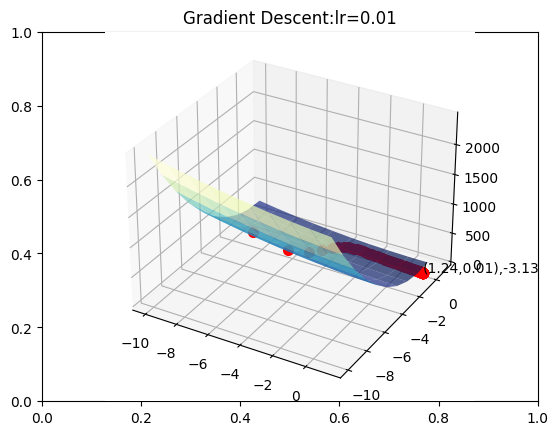

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


# Update the student ID to your BITS email ID
student_id = "2023xx05741"



student_id = ''.join([i for i in student_id if i.isdigit()])
random.seed(student_id)

# Set the number of iterations and learning rate
iters = random.randint(100, 300)
learning_rate = 0.01

# Evaluate the function at x
def C(x):




    return (x.T @ np.array([[2, 1], [1, 20]]) @ x) - (np.array([5, 3]).reshape(2, 1).T @ x)

# Evaluate the gradient of function at x
def dC(x):
    return 2 * (np.array([[2, 1], [1, 20]]) @ x) - np.array([5, 3]).reshape(2, 1)





def plot_grad_change(X, Y, Z, c, grad_xs0, grad_xs1, grad_ys):
    fig = plt.figure()
    title_str = "Gradient Descent:" + "lr=" + str(learning_rate)
    plt.title(title_str)
    ax = fig.add_subplot(projection='3d')

    ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r, alpha=0.7)
    for i in range(len(grad_xs0)):
        ax.plot([grad_xs0[i]], [grad_xs1[i]], grad_ys[i][0], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
    ax.text(grad_xs0[-1], grad_xs1[-1], grad_ys[-1][0][0],
            "(" + str(round(grad_xs0[-1], 2)) + "," +
            str(round(grad_xs1[-1], 2)) + ")," +
            str(round(grad_ys[-1][0][0], 2)))
    plt.show()

def GD(start, x, y, z, c, dc, iters, eta):
    px = start.astype(float)
    py = c(px).astype(float)
    print("GD Start Point:", px, py)
    print("Num steps:", iters)
    grad_xs0, grad_xs1, grad_ys = [px[0][0]], [px[1][0]], [py]

    for iter in range(iters):
        grad = dc(px)
        # Update px using gradient descent
        px = px - eta * grad
        # Update py
        py = c(px)

        grad_xs0.append(px[0][0])
        grad_xs1.append(px[1][0])
        grad_ys.append(py)
    print("Converged Point:", px, py)
    plot_grad_change(x, y, z, c, grad_xs0, grad_xs1, grad_ys)


lo = -10
hi = 10
x1 = round(random.uniform(lo, 0), 4)
x2 = round(random.uniform(lo, 0), 4)
x = np.linspace(lo, 1, hi)
y = np.linspace(lo, 1, hi)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i][j] = C(np.array([X[i][j], Y[i][j]]).reshape(2, 1))
# Start Gradient Descent
GD(np.array([x1, x2]).reshape(2, 1), X, Y, Z, C, dC, iters, learning_rate)


Gradient Descent. Please refer to the file ”assign2 q3.py”
provided along with this assignment. (2 marks)

Repeat the exercise in (Q3) for the loss function given below:
L = 3 ∗ x2 + 2 ∗ y2 + 20 ∗ cos(x) ∗ cos(y)

Modify the file ”assign2 q3.py” only in-between the lines marked with comment
as described in Q3. Do not modify any other line of the script.

Deliverables: A) A screenshot of the 3D plot obtained when you execute the
python script after adding your lines of code. B) A screenshot of the console
output obtained obtained when you execute the python script after adding
your lines of code. C) The equations of the Loss function and gradient of
loss function on which the gradient descent was performed. D) A snapshot
of the lines of code that was added by you in the designated places. E) State
whether the algorithm converged to the global minima, a local minima or if
it failed to converge in your case

<ipython-input-19-4f80e48690a0>:84: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i][j] = C(np.array([X[i][j], Y[i][j]]).reshape(2, 1))


GD Start Point: [[-5.5353]
 [-6.917 ]] [[199.42314033]]
Num steps: 282
Converged Point: [[-2.37460351e-30]
 [-2.59573908e+00]] [[-3.61796668]]


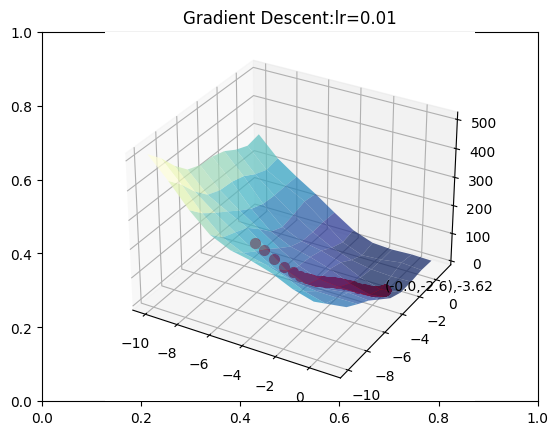

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

##### To be Updated #####
# e.g.,if your BITS email id is 023ab12345@wilp.bits-pilani.com
# update the below line as student_id = "023xx12345"
student_id = "2023xx05741"
#########################

student_id = ''.join([i for i in student_id if i.isdigit()])
random.seed(student_id)

# Set the number of iterations and learning rate
iters = random.randint(100, 300)
learning_rate = 0.01

# Evaluate the function at x
def C(x):
    ##### To be Updated #####
    # Loss function: L = 3 * x^2 + 2 * y^2 + 20 * cos(x) * cos(y)
    return 3 * x[0]**2 + 2 * x[1]**2 + 20 * np.cos(x[0]) * np.cos(x[1])
    #########################


# Evaluate the gradient of the loss function at x
def dC(x):
    ##### To be Updated #####
    # Compute and return the gradient
    grad_x = 6 * x[0] - 20 * np.sin(x[0]) * np.cos(x[1])
    grad_y = 4 * x[1] - 20 * np.cos(x[0]) * np.sin(x[1])
    return np.array([grad_x, grad_y])
    #########################


# Other functions remain the same
def plot_grad_change(X, Y, Z, c, grad_xs0, grad_xs1, grad_ys):
    fig = plt.figure()
    title_str = "Gradient Descent:" + "lr=" + str(learning_rate)
    plt.title(title_str)
    ax = fig.add_subplot(projection='3d')

    ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r, alpha=0.7)
    for i in range(len(grad_xs0)):
        ax.plot([grad_xs0[i]], [grad_xs1[i]], grad_ys[i][0], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
    ax.text(grad_xs0[-1], grad_xs1[-1], grad_ys[-1][0][0],
            "(" + str(round(grad_xs0[-1], 2)) + "," +
            str(round(grad_xs1[-1], 2)) + ")," +
            str(round(grad_ys[-1][0][0], 2)))
    plt.show()

def GD(start, x, y, z, c, dc, iters, eta):
    px = start.astype(float)
    py = np.array([c(px)]).astype(float)  # Convert scalar value to array
    print("GD Start Point:", px, py)
    print("Num steps:", iters)
    grad_xs0, grad_xs1, grad_ys = [px[0][0]], [px[1][0]], [py]  # Initialize grad_ys as a list containing arrays

    for iter in range(iters):
        ##### To be Updated #####
        # Update px using gradient descent
        px = px - eta * dc(px)
        # Update py
        py = np.array([c(px)]).astype(float)  # Convert scalar value to array
        #########################
        grad_xs0.append(px[0][0])
        grad_xs1.append(px[1][0])
        grad_ys.append(py)
    print("Converged Point:", px, py)
    plot_grad_change(x, y, z, c, grad_xs0, grad_xs1, grad_ys)



lo = -10
hi = 10
x1 = round(random.uniform(lo, 0), 4)
x2 = round(random.uniform(lo, 0), 4)
x = np.linspace(lo, 1, hi)
y = np.linspace(lo, 1, hi)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i][j] = C(np.array([X[i][j], Y[i][j]]).reshape(2, 1))
# Start Gradient Descent
GD(np.array([x1, x2]).reshape(2, 1), X, Y, Z, C, dC, iters, learning_rate)